**2. The Exponential Integrate-and-Fire model**  **given a step input current to ELIF model to see Results are linear or non-linear ?**
Book chapters

The Exponential Integrate-and-Fire model is introduced in Chapter 5 Section 2

Python classes

The module exponential_integrate_fire.exp_IF implements the dynamics given in the book (equation 5.6).

To get started, copy the following code into a Jupyter notebook. It follows a common pattern used in these exercises: use the input_factory to get a specific current, inject it into the neuron model we provide, and finally use the plot_tools to visualize the state variables.

Note that you can change all parameters of the neuron by using the named parameters of the function simulate_exponential_IF_neuron(). If you do not specify any parameter, the default values are used (see next code block). You can access these variables in your code by prefixing them with the module name (for example exp_IF.FIRING_THRESHOLD_v_spike).



WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 7


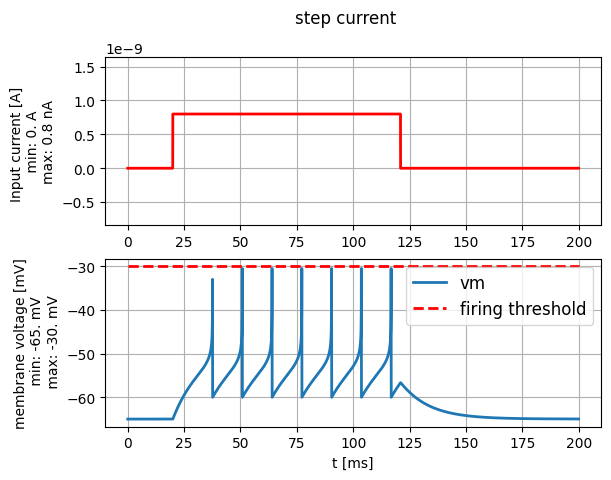

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

**2.1. Exercise: rehobase threshold**
The goal of this exercise is to study the **minimal current that can elicit a spike** and to understand the different notions of a firing threshold. The Exponential-Integrate-and-Fire neuron model has two threshold related parameters. They correspond to the named parameters v_spike and v_rheobase in the function simulate_exponential_IF_neuron().

2.1.1. Question:
-Modify the code example given above: Call simulate_exponential_IF_neuron() and set the function parameter **v_spike to +10mV** (which overrides the **default value -30mV**). What do you expect to happen? How many spikes will be generated? 

nr of spikes: 7


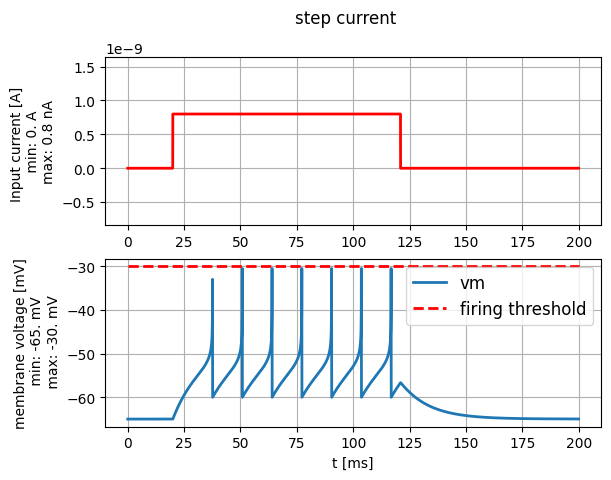

In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

# Create input current
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

# Simulate exponential IF neuron with v_spike set to +10mV
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_spike=10 * b2.mV)

# Plot voltage and current traces
plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))


 
-**Compute the minimal amplitude Irh**  **we applied rheobase concept here**
 **of a constant input current such that the neuron will elicit a spike.** If you are not sure what and how to compute Irh
, have a look at Figure 5.1 and the textbox “Rheobase threshold and interpretation of parameters” in the book.
Validate your result: Modify the code given above and inject a current of amplitude Irh
 and 300ms duration into the expIF neuron.

nr of spikes: 3


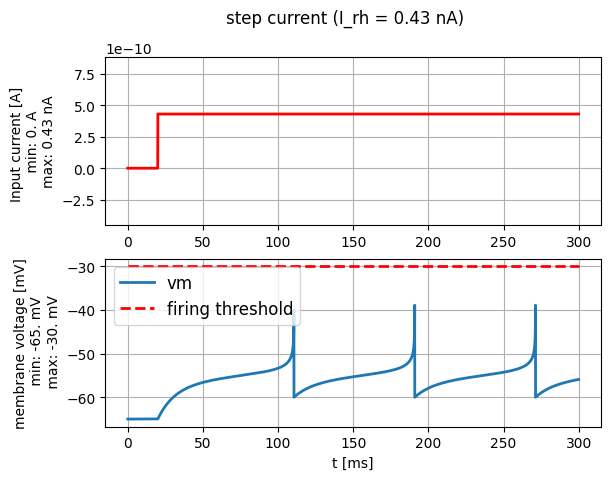

In [3]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

def find_rheobase(current_step=0.01*b2.namp, max_iterations=1000):
    amplitude = 0 * b2.namp
    for _ in range(max_iterations):
        input_current = input_factory.get_step_current(
            t_start=20, t_end=120, unit_time=b2.ms, amplitude=amplitude)
        
        state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
            I_stim=input_current, simulation_time=200*b2.ms)
        
        if spike_monitor.count[0] > 0:
            return amplitude
        amplitude += current_step
    return None

I_rh = find_rheobase()

# Validate the result by injecting current of amplitude I_rh
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title=f"step current (I_rh = {I_rh})",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))


**2.2. Exercise: strength-duration curve**
The **minimal amplitude to elicit a spike depends on the duration of the current**. For an **infinitely long current, we’ve just calculated the rheobase current.** For **short pulses and step currents, we can “experimentally” determine the minimal currents.** If we **plot the amplitude versus duration**, w**e get the strength-duration curve.**

2.2.1. Question:
Have a look at the following code: for the values i = 0, 2 and 6 we did not provide the minimal amplitude, but the entries in min_amp[i] are set to 0. Complete the min_amp list.

Set the index i to 0.
Enter an informed guess into the min_amp table.
Run the script.
Depending on the plot, increase or decrease the amplitude, repeat until you just get one spike.
Do the same for i = 2 and i = 6.
At the end of the script, the strength-duration curve is plotted. Discuss it. You may want to add a log-log plot to better see the asymptotic behaviour.

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

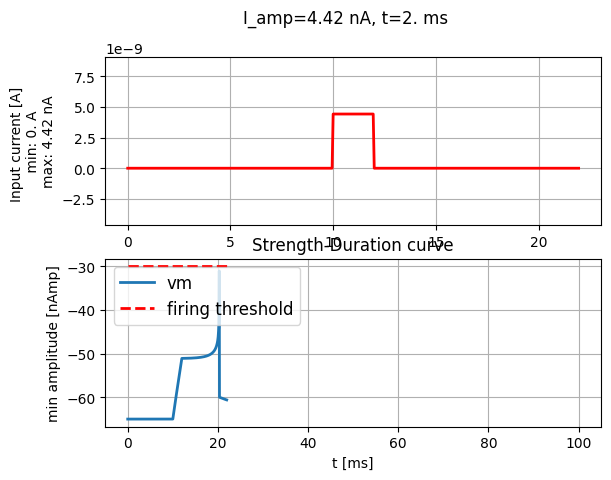

In [4]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

i=1  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [0., 4.42, 0., 1.10, .70, .48, 0.]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")